In [393]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
TensorFlow version :  1.14.0
Keras version :  2.0.0


In [394]:
from keras.models import load_model
model = load_model('model/MNIST_CNN_model.h5')

In [395]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              3137000   
__________

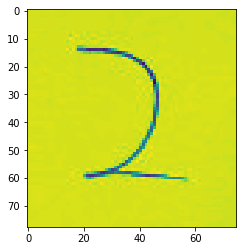

In [396]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

test1 = cv2.imread('number_data/2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(test1);

In [397]:
def num_to_mnist(num):
    M = np.ones(num.shape, dtype = "uint8") * 20 # 손 글씨 이미지가 어두워서 밝게 함
    num = cv2.add(num, M)   
    num = cv2.resize(num, dsize=(28, 28), interpolation=cv2.INTER_AREA)
    num = (num > 230) * num
    num = cv2.bitwise_not(num)
    num = num.astype('float32') / 255.
    return num

1/1 [==============================] - 0s
The Answer is  [8]


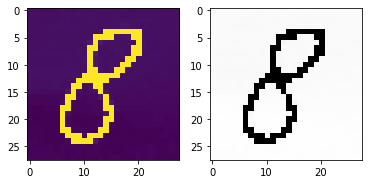

In [398]:
num = cv2.imread('number_data/8.png', cv2.IMREAD_GRAYSCALE)
num = num_to_mnist(num)
plt.subplot(1,2,1)
plt.imshow(num)
plt.subplot(1,2,2)
plt.imshow(num, cmap='Greys', interpolation='nearest');

num = num.reshape((1, 28, 28, 1))

print('The Answer is ', model.predict_classes(num))

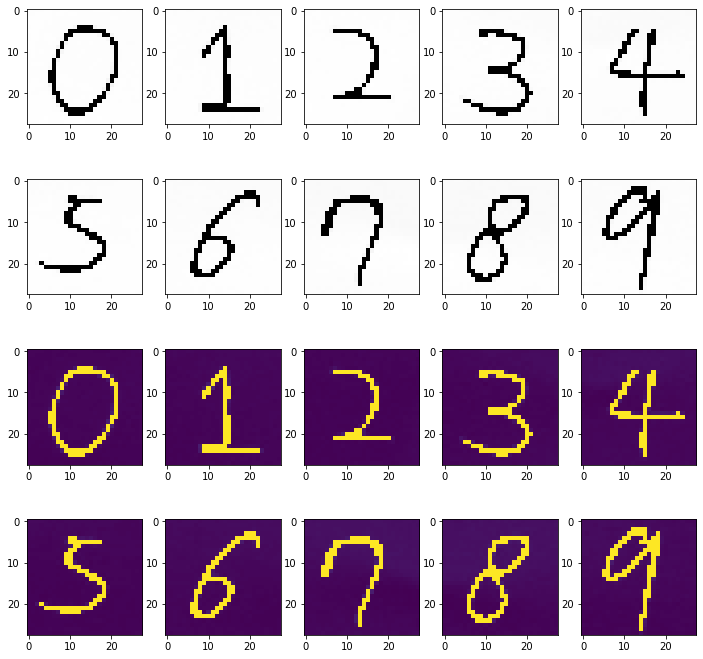

In [399]:
plt.figure(figsize=(12, 12))
for i in range(10):
    num = cv2.imread('number_data/{}.png'.format(i), cv2.IMREAD_GRAYSCALE)
    num = num_to_mnist(num)
    plt.subplot(4, 5, i+1)
    plt.imshow(num, cmap='Greys', interpolation='nearest');
    plt.subplot(4, 5, i+11)
    plt.imshow(num)

In [400]:
for i in range(10):
    num = cv2.imread('number_data/{}.png'.format(i), cv2.IMREAD_GRAYSCALE)
    num = num_to_mnist(num)
    num = num.reshape((1, 28, 28, 1))
    print('The Answer is ', model.predict_classes(num))

1/1 [==============================] - 0s
The Answer is  [0]
1/1 [==============================] - 0s
The Answer is  [1]
1/1 [==============================] - 0s
The Answer is  [2]
1/1 [==============================] - 0s
The Answer is  [3]
1/1 [==============================] - 0s
The Answer is  [4]
1/1 [==============================] - 0s
The Answer is  [5]
1/1 [==============================] - 0s
The Answer is  [6]
1/1 [==============================] - 0s
The Answer is  [7]
1/1 [==============================] - 0s
The Answer is  [8]
1/1 [==============================] - 0s
The Answer is  [4]
